# 課程目標:
    
    了解MLP 在神經網路上的應用

# 範例重點:
    以Keras 自帶的 手寫辨識的數據集來說明 MLP 建構的網路模型

# 資料預處理

In [0]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [0]:
# 載入手寫辨識的資料集
(x_img_train, y_label_train), (x_img_test, y_label_test) = mnist.load_data()

# 查詢檔案維度資訊
print(f"Shape of x_img_train: {x_img_train.shape}")
print(f"Shape of y_label_train: {y_label_train.shape}")
print(f"Shape of x_img_test: {x_img_test.shape}")
print(f"Shape of y_label_test: {y_label_test.shape}")

11493376/11490434 [==============================] - 2s 0us/step
Shape of x_img_train: (60000, 28, 28)
Shape of y_label_train: (60000,)
Shape of x_img_test: (10000, 28, 28)
Shape of y_label_test: (10000,)


In [0]:
# 指定測試集與訓練資料集的shape (28*28 --> 784)
x_img_train_reshape = x_img_train.reshape(60000, 784).astype('float32')
x_img_test_reshape = x_img_test.reshape(10000, 784).astype('float32')
print(f"Shape of x_img_train: {x_img_train.shape} --> {x_img_train_reshape.shape}")
print(f"Shape of x_img_test: {x_img_test.shape} --> {x_img_test_reshape.shape}")

Shape of x_img_train: (60000, 28, 28) --> (60000, 784)
Shape of x_img_test: (10000, 28, 28) --> (10000, 784)


In [0]:
# 正規化
x_img_train_normalize = x_img_train_reshape / 255.0
x_img_test_normalize = x_img_test_reshape / 255.0
print(f"Before normalized: shape = {x_img_train_reshape.shape} \nfirst pixle: {x_img_train_reshape[0][0]}")
print(f"After normalized: shape = {x_img_train_normalize.shape} \nfirst pixle: {x_img_train_normalize[0][0]}\n")

# OneHot Encoding
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
print(f"Before OneHot Encodeing: shape = {y_label_train.shape} \nfirst data: {y_label_train[0]}")
print(f"After OneHot Encodeing: shape = {y_label_train_OneHot.shape} \nfirst data: {y_label_train_OneHot[0]}")

Before normalized: shape = (60000, 784) 
first pixle: 0.0
After normalized: shape = (60000, 784) 
first pixle: 0.0

Before OneHot Encodeing: shape = (60000,) 
first data: 5
After OneHot Encodeing: shape = (60000, 10) 
first data: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# 建立模型

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [0]:
# 宣告採用序列模型
model = Sequential()

# 建構輸入層: 256 個神經元
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))

# 建構輸出層: 10 個分類 
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

# Compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [0]:
train_history = model.fit(x=x_img_train_normalize, y=y_label_train_OneHot, validation_split=0.2, epochs=10, batch_size=32, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 48000 samples, validate on 12000 samples
Epoch 1/10





48000/48000 [==============================] - 15s 318us/step - loss: 0.2700 - acc: 0.9223 - val_loss: 0.1332 - val_acc: 0.9611
Epoch 2/10
48000/48000 [==============================] - 6s 120us/step - loss: 0.1080 - acc: 0.9682 - val_loss: 0.1060 - val_acc: 0.9682
Epoch 3/10
48000/48000 [==============================] - 5s 111us/step - loss: 0.0715 - acc: 0.9779 - val_loss: 0.0945 - val_acc: 0.9711
Epoch 4/10
48000/48000 [==============================] - 6s 122us/step - loss: 0.0515 - acc: 0.9841 - val_loss: 0.0803 - val_acc: 0.9754
Epoch 5/10
48000/48000 [==============================] - 6s 115us/step - loss: 0.0372 - acc: 0.9884 - val_loss: 0.0841 - val_acc: 0.9749
Epoch 6/10
48000/48000 [==============================] - 6s 116us/step - loss: 0.0254 - acc: 0.9921 - val_loss: 0.0770 - val_acc: 0.9782
Epoch 7/10
48000/48

# 以圖形顯示訓練過程

In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

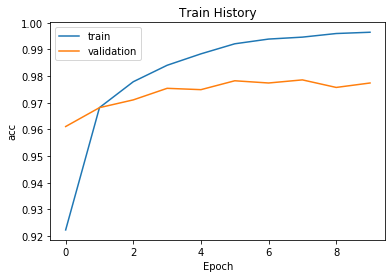

In [0]:
show_train_history(train_history, 'acc', 'val_acc')

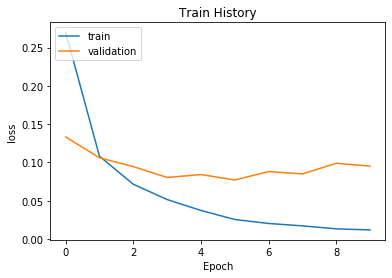

In [0]:
show_train_history(train_history, 'loss', 'val_loss')

# 評估模型準確率

In [0]:
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print('loss: ', scores[0])
print('accuracy: ', scores[1])

10000/10000 [==============================] - 0s 39us/step
loss:  0.08307531290856059
accuracy:  0.9781
